In [ ]:
path="https://raw.githubusercontent.com/chirudukuru/DMDW/main/student-mat.csv"

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv(path)

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
df1=df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]

In [ ]:
df1.head()


,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,yes,no,no,no,yes,yes,no,no
1,no,yes,no,no,no,yes,yes,no
2,yes,no,yes,no,yes,yes,yes,no
3,no,yes,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,yes,no,no


In [ ]:
df1=df1.replace('no',0)
df1=df1.replace('yes',1)

In [ ]:
df1.head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,0


In [ ]:
n=np.array(df1[['schoolsup','famsup']])
n=n.reshape(-1,2)
n.shape

(395, 2)

In [ ]:
m=np.array(df1[['internet','romantic']])
m=n.reshape(-1,2)
m.shape

(395, 2)

In [ ]:
from scipy.spatial import distance
dist_matrix=distance.cdist(n,m)
print(dist_matrix)

[[0. 1. 1. ... 0. 1. 1.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 1. ... 0. 1. 1.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

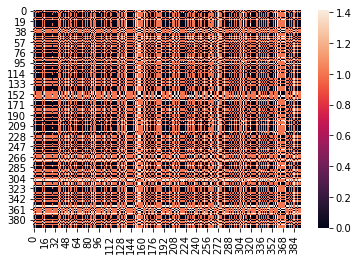

In [ ]:
sns.heatmap(dist_matrix)
plt.show()

In [ ]:
#nominal attribute

In [ ]:
nominal=df[['Mjob','Fjob','reason','guardian']]
nominal=nominal.replace('at_home','home')
nominal=(nominal.astype('category'))

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
nominal['Mjob']=lb.fit_transform(nominal['Mjob'])
nominal['Fjob']=lb.fit_transform(nominal['Fjob'])
nominal['reason']=lb.fit_transform(nominal['reason'])
nominal['guardian']=lb.fit_transform(nominal['guardian'])


In [ ]:
nominal.head()

,Mjob,Fjob,reason,guardian
0,1,4,0,1
1,1,2,0,0
2,1,2,2,1
3,0,3,1,1
4,2,2,1,0


In [ ]:
nominal1=np.array(nominal)
nominal1.reshape(-1,2)
nominal2=np.array(nominal)
nominal2.reshape(-1,2)

array([[1, 4],
       [0, 1],
       [1, 2],
       ...,
       [0, 1],
       [2, 1],
       [0, 0]])

In [ ]:
from scipy.spatial import distance
dist_matrix=distance.cdist(nominal1,nominal2)
print(dist_matrix)

[[0.         2.23606798 2.82842712 ... 2.44948974 2.82842712 3.31662479]
 [2.23606798 0.         2.23606798 ... 2.23606798 2.23606798 1.41421356]
 [2.82842712 2.23606798 0.         ... 2.44948974 2.82842712 2.64575131]
 ...
 [2.44948974 2.23606798 2.44948974 ... 0.         1.41421356 2.23606798]
 [2.82842712 2.23606798 2.82842712 ... 1.41421356 0.         1.73205081]
 [3.31662479 1.41421356 2.64575131 ... 2.23606798 1.73205081 0.        ]]


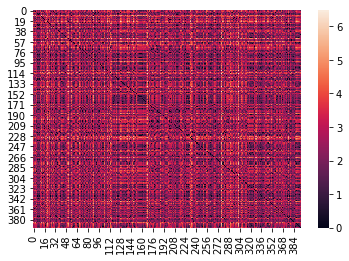

In [ ]:
sns.heatmap(dist_matrix)
plt.show()

In [ ]:
#numeric attribute